<h1><span? style="color:blue"> 프로젝트명: 신용거래 이상탐지 데이터 다루기 </span>

<h1><span? style="color:blue"> 1. 데이터 둘러보기 </span><h1/>
작성자:이강인

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/aiffel/data/fraud.csv')

In [5]:
df #491134 rows × 22 columns

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,...,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [7]:
pd.set_option('display.max_columns',21)

In [8]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,...,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,...,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,...,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,...,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [9]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


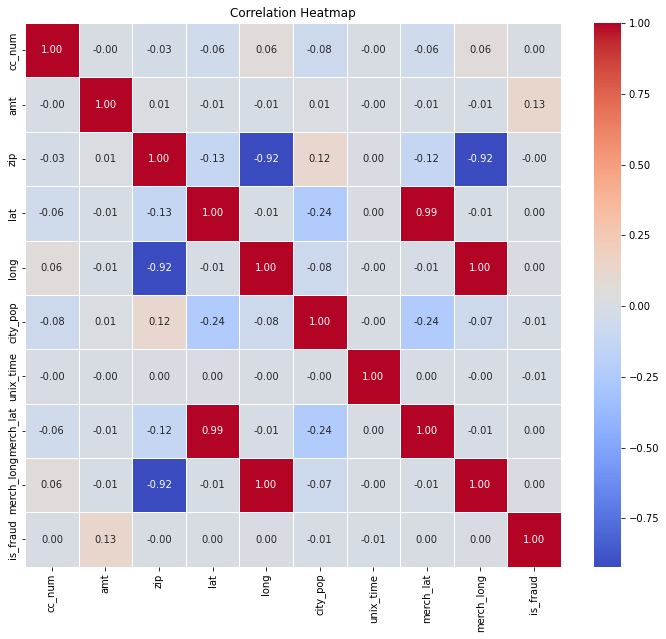

In [10]:
#빠르게 상관관계 파악하기 by heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

### merch_lat 와 cs_latitude가 1에 가까운 상관관계는 똑같은 장소에서 거래가 이루어진 것으로 예측 가능, 그 외 유의미한 정보 없음

<h1><span style="color:blue"> 2. 불필요한 Columns 확인 & Columns 이름 변경& 결측치 처리 </span>

In [11]:
pd.set_option('display.max_columns',22)

In [12]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


### 각 column를 좀 더 명확하게 rename 필요

In [13]:
df = df.rename({'trans_date_trans_time': 'trans_date_time', 
                'category': 'merch_category', 'first':'cs_first_name', 'last':'cs_last_name', 'gender':'cs_gender', 'street':'cs_street', 'city':'cs_city', 'state':'cs_state', 'zip':'cs_zip','lat':'cs_latitude','long':'cs_longtitude','job':'cs_job','dob':'cs_DOB', 'merch_lat':'merch_latitude', 'merch_long':'merch_longitude'}, axis = 1)

In [14]:
df

,trans_date_time,cc_num,merchant,merch_category,amt,cs_first_name,cs_last_name,cs_gender,cs_street,cs_city,cs_state,cs_zip,cs_latitude,cs_longtitude,city_pop,cs_job,cs_DOB,trans_num,unix_time,merch_latitude,merch_longitude,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [15]:
df.nunique()

trans_date_time    488474
cc_num                124
merchant              693
merch_category         14
amt                 36446
cs_first_name          92
cs_last_name          102
cs_gender               2
cs_street             124
cs_city               121
cs_state               44
cs_zip                124
cs_latitude           124
cs_longtitude         124
city_pop              122
cs_job                110
cs_DOB                123
trans_num          491134
unix_time          488477
merch_latitude     484503
merch_longitude    487445
is_fraud                2
dtype: int64

In [16]:
df['cc_num'].value_counts() #총 124개의 신용카드가 사용됨

6538441737335434    4392
30270432095985      4392
4364010865167176    4386
4642255475285942    4386
6538891242532018    4386
                    ... 
36913587729122      3641
4681601008538160    3638
30551643947183      3638
4005676619255478    3638
3511378610369890    3628
Name: cc_num, Length: 124, dtype: int64

In [17]:
df.isna().sum() #null 없음, 결측치가 없어 다양한 방법으로 결측치 제거 시도 어려움

trans_date_time    0
cc_num             0
merchant           0
merch_category     0
amt                0
cs_first_name      0
cs_last_name       0
cs_gender          0
cs_street          0
cs_city            0
cs_state           0
cs_zip             0
cs_latitude        0
cs_longtitude      0
city_pop           0
cs_job             0
cs_DOB             0
trans_num          0
unix_time          0
merch_latitude     0
merch_longitude    0
is_fraud           0
dtype: int64

### 중복값 제거

In [18]:
df[df.duplicated()]

,trans_date_time,cc_num,merchant,merch_category,amt,cs_first_name,cs_last_name,cs_gender,cs_street,cs_city,cs_state,cs_zip,cs_latitude,cs_longtitude,city_pop,cs_job,cs_DOB,trans_num,unix_time,merch_latitude,merch_longitude,is_fraud


In [19]:
df[df.duplicated('trans_num')] #trans_num 값은 중복값이 이상값인데 없음.

,trans_date_time,cc_num,merchant,merch_category,amt,cs_first_name,cs_last_name,cs_gender,cs_street,cs_city,cs_state,cs_zip,cs_latitude,cs_longtitude,city_pop,cs_job,cs_DOB,trans_num,unix_time,merch_latitude,merch_longitude,is_fraud


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   trans_date_time  491134 non-null  object 
 1   cc_num           491134 non-null  int64  
 2   merchant         491134 non-null  object 
 3   merch_category   491134 non-null  object 
 4   amt              491134 non-null  float64
 5   cs_first_name    491134 non-null  object 
 6   cs_last_name     491134 non-null  object 
 7   cs_gender        491134 non-null  object 
 8   cs_street        491134 non-null  object 
 9   cs_city          491134 non-null  object 
 10  cs_state         491134 non-null  object 
 11  cs_zip           491134 non-null  int64  
 12  cs_latitude      491134 non-null  float64
 13  cs_longtitude    491134 non-null  float64
 14  city_pop         491134 non-null  int64  
 15  cs_job           491134 non-null  object 
 16  cs_DOB           491134 non-null  obje

<h1><span? style="color:blue"> 2. 이상치 처리하기 </span><h1/>

In [21]:
df.describe()

,cc_num,amt,cs_zip,cs_latitude,cs_longtitude,city_pop,unix_time,merch_latitude,merch_longitude,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


### 1. trans_date_time

In [22]:
# datetime type으로 변경
from datetime import datetime
df['trans_date_time'] = pd.to_datetime(df['trans_date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   trans_date_time  491134 non-null  datetime64[ns]
 1   cc_num           491134 non-null  int64         
 2   merchant         491134 non-null  object        
 3   merch_category   491134 non-null  object        
 4   amt              491134 non-null  float64       
 5   cs_first_name    491134 non-null  object        
 6   cs_last_name     491134 non-null  object        
 7   cs_gender        491134 non-null  object        
 8   cs_street        491134 non-null  object        
 9   cs_city          491134 non-null  object        
 10  cs_state         491134 non-null  object        
 11  cs_zip           491134 non-null  int64         
 12  cs_latitude      491134 non-null  float64       
 13  cs_longtitude    491134 non-null  float64       
 14  city_pop         491

In [23]:
df['trans_date_time']

0        2019-01-01 00:00:44
1        2019-01-01 00:12:34
2        2019-01-01 00:17:16
3        2019-01-01 00:20:15
4        2019-01-01 00:23:41
                 ...        
491129   2020-12-31 23:56:48
491130   2020-12-31 23:56:57
491131   2020-12-31 23:59:09
491132   2020-12-31 23:59:15
491133   2020-12-31 23:59:34
Name: trans_date_time, Length: 491134, dtype: datetime64[ns]

In [24]:
#trans_date_time의 기본적인 time range를 벗어나는 지 확인
df['trans_date_time'] = pd.to_datetime(df['trans_date_time'])

start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2020-12-31 23:59:59')  

outliers = df[(df['trans_date_time'] < start_date) | (df['trans_date_time'] > end_date)]

print(outliers)


Empty DataFrame
Columns: [trans_date_time, cc_num, merchant, merch_category, amt, cs_first_name, cs_last_name, cs_gender, cs_street, cs_city, cs_state, cs_zip, cs_latitude, cs_longtitude, city_pop, cs_job, cs_DOB, trans_num, unix_time, merch_latitude, merch_longitude, is_fraud]
Index: []


#### 시간 순서로 기록된 것으로 확인되며 이상치는 없는 것으로 판단

<h3>2. cc_num 살펴보기

In [25]:
df['cc_num'].nunique()

124

In [26]:
df[df['is_fraud'] == 1][['cc_num', 'is_fraud']].nunique() #특정 크레딧 카드만 사기 관련 카드는 아닌 듯

cc_num      122
is_fraud      1
dtype: int64

In [27]:
df['cc_num'].unique() #무작위 숫자로 보임. outlier 판단 불가

array([       630423337322, 4956828990005111019,     180048185037117,
           374930071163758,    2712209726293386,    3598215285024754,
           213141712584544,        676372984911,    4642255475285942,
          3553629419254918,    2720433095629877,    4716561796955522,
       4512828414983801773,      30273037698427,    6011893664860915,
          6534628260579800,        571365235126,     213112402583773,
          3502088871723054,    3518234918950662,      30270432095985,
          6011104316292105,    6011504998544485,    3511378610369890,
          6011367958204270,    4653879239169997,    3583635130604947,
          3541160328600277, 4646845581490336108,    3575789281659026,
          4302480582202074,    3533742182628021,    4364010865167176,
             4745996322265,    3576431665303017,    3566094707272327,
          2264937662466770,     377026671291680,       4681699462969,
           340953839692349,     373905417449658,        581686439828,
       4587657402165

In [28]:
df['cc_num'].value_counts() #적절하게 분포 된 것으로 보임

6538441737335434    4392
30270432095985      4392
4364010865167176    4386
4642255475285942    4386
6538891242532018    4386
                    ... 
36913587729122      3641
4681601008538160    3638
30551643947183      3638
4005676619255478    3638
3511378610369890    3628
Name: cc_num, Length: 124, dtype: int64

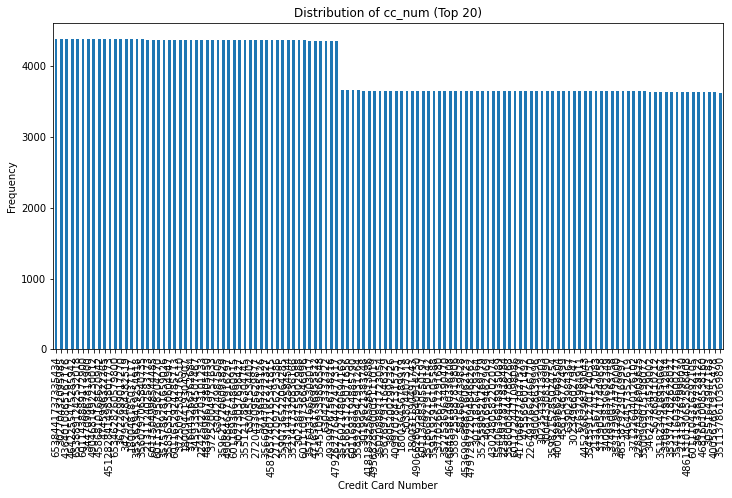

In [29]:
# 이상하게 각 카드의 사용량이 두개의 그룹으로 나뉘지만 실제 자료가 아닌 모의 자료라는 것을 고려해야 할 듯
cc_num_counts = df['cc_num'].value_counts()

plt.figure(figsize=(12, 6))
cc_num_counts.plot(kind='bar')
plt.title('Distribution of cc_num (Top 20)')
plt.xlabel('Credit Card Number')
plt.ylabel('Frequency')
plt.show()


#### 총 124개 신용카드의 기록이며 이 중 122개가 fraud detected된 신용카드므로 특정 신용카드만 detection에 걸린 건 아닌 것으로 판단. 특정 카드의 사용만 기록된 것 아님을 확인

<h3> 3. amt 살펴보기

In [30]:
df['amt'].nunique()

36446

In [31]:
df['amt'].describe() #max값이 커보임

count    491134.000000
mean         69.050120
std         160.322867
min           1.000000
25%           8.960000
50%          42.170000
75%          80.330000
max       25086.940000
Name: amt, dtype: float64

In [32]:
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]
outliers.sort_values(by='amt', ascending = False)

,trans_date_time,cc_num,merchant,merch_category,amt,cs_first_name,cs_last_name,cs_gender,cs_street,cs_city,cs_state,cs_zip,cs_latitude,cs_longtitude,city_pop,cs_job,cs_DOB,trans_num,unix_time,merch_latitude,merch_longitude,is_fraud
93045,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.94,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,1843,42.6911,-71.1605,76383,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,42.397174,-71.474163,0
49446,2019-04-07 15:32:23,6538441737335434,fraud_Tillman LLC,travel,17897.24,Gina,Grimes,F,444 Robert Mews,Clarks Mills,PA,16114,41.3851,-80.1752,606,Energy manager,1997-09-22,1c9f2b574fb9bf860c76ea200252fe05,1333812743,41.361042,-79.665772,0
410031,2020-09-21 12:02:00,3566094707272327,fraud_Johnston-Casper,travel,16837.08,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,Newhall,CA,91321,34.3795,-118.5230,34882,Health physicist,1971-04-25,ba246b12f894ab083706e72f9d90ad15,1379764920,35.111725,-118.128435,0
198719,2019-11-17 20:00:17,2264937662466770,fraud_Goyette-Herzog,travel,15047.03,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,TX,78214,29.3641,-98.4924,1595797,Land,1995-10-17,969e374d8c4e1a628b60150391a70742,1353182417,29.849413,-98.224021,0
43412,2019-03-28 16:53:47,630451534402,fraud_Ankunding-Carroll,travel,14630.68,Rachel,Daniels,F,561 Little Plain Apt. 738,Wetmore,MI,49895,46.3535,-86.6345,765,Immunologist,1972-06-12,c3fd5aeb603b150ce5c05c7ee38ada97,1332953627,46.944452,-85.746696,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322378,2020-05-24 16:08:54,6011438889172900,"fraud_Dare, Casper and Bartoletti",kids_pets,187.40,Allison,Allen,F,40624 Rebecca Spurs,De Witt,AR,72042,34.2853,-91.3336,5161,Electrical engineer,1993-04-08,930df7518634a688aacde4e50f635083,1369411734,34.252718,-92.181941,0
459538,2020-12-06 12:13:22,3595192916105588,fraud_Connelly-Carter,home,187.39,Dustin,Roberts,M,3283 James Station,Fayetteville,NC,28314,35.0583,-79.0080,238602,"Scientist, research (maths)",1993-05-14,2cfa44ff8c5687065cb604049b65626e,1386332002,35.538461,-79.355849,0
10656,2019-01-24 17:49:46,3521417320836166,fraud_Hamill-D'Amore,health_fitness,187.39,Angela,Hodges,F,08236 Kim Hill,Indianapolis,IN,46254,39.8490,-86.2720,910148,Firefighter,1975-11-30,3e480c333fd15f74c2dd278721cebf49,1327427386,39.619146,-85.768895,0
450880,2020-11-28 10:56:35,213141712584544,"fraud_Lockman, West and Runte",grocery_pos,187.39,Margaret,Curtis,F,742 Oneill Shore,Florence,MS,39073,32.1530,-90.1217,19685,Fine artist,1984-12-24,619ffc0cb9d8fc613cc356b2f5d2d7df,1385636195,31.248884,-89.602210,0


In [33]:
df[df['is_fraud'] == 1].sort_values(by='amt', ascending = False)

,trans_date_time,cc_num,merchant,merch_category,amt,cs_first_name,cs_last_name,cs_gender,cs_street,cs_city,cs_state,cs_zip,cs_latitude,cs_longtitude,city_pop,cs_job,cs_DOB,trans_num,unix_time,merch_latitude,merch_longitude,is_fraud
135833,2019-08-10 22:10:23,3500969075198072,fraud_Metz-Boehm,shopping_pos,1371.81,Kenneth,Sanchez,M,0110 Ashley Forest,Tekoa,WA,99033,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,20cf5453224328229e06ae7b4df10302,1344636623,47.065996,-116.262297,1
7933,2019-01-18 23:20:16,4586810168620942,fraud_Pouros-Conroy,shopping_pos,1334.07,Michelle,Gregory,F,6983 Carrillo Isle,Edisto Island,SC,29438,32.5486,-80.3070,2408,"Sales professional, IT",1997-07-05,f0c086495d403024ce6d30f715713319,1326928816,31.615611,-79.702908,1
316777,2020-05-14 23:53:49,4745996322265,"fraud_Kuhic, Bins and Pfeffer",shopping_net,1276.77,Carrie,Washington,F,6114 Adams Harbor Suite 096,Kingsford Heights,IN,46346,41.4802,-86.6919,1423,"Psychologist, forensic",1998-10-07,42b5333784b7efcb3216cc606be17508,1368575629,42.174728,-86.972444,1
75667,2019-05-20 23:09:59,2720433095629877,"fraud_Stanton, Jakubowski and Baumbach",shopping_net,1262.19,Mark,Wood,M,854 Walker Dale Suite 488,Bowdoin,ME,4287,44.0575,-69.9656,3224,"Engineer, electronics",1997-08-22,dffe9a4375a6e74c2b9c4502bd09bcce,1337555399,43.879003,-70.439097,1
311971,2020-05-06 23:11:57,4536996888716062123,fraud_Fisher Inc,shopping_net,1253.93,Nathan,Mendoza,M,767 Adam Mill Apt. 115,Espanola,NM,87533,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,1972-07-18,2cba079a307eca2f8d34d92ddadb6783,1367881917,35.190482,-105.604155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70054,2019-05-12 06:31:47,3533742182628021,fraud_Schmitt Inc,gas_transport,6.70,Robert,Haynes,M,857 Aaron Circles Suite 398,Johns Island,SC,29455,32.8357,-79.8217,20478,Materials engineer,1997-06-04,4c93fb9df4c3de881377cb0762d7419f,1336804307,33.484412,-80.001776,1
131834,2019-08-05 00:22:03,213157767990030,fraud_Block Group,misc_pos,6.69,Tara,Campbell,F,05050 Rogers Well Apt. 439,Rock Springs,WY,82901,41.6060,-109.2300,27971,Music therapist,1984-08-01,7b430cbaa0f2d32dc6c6fb0e24e88abd,1344126123,41.873253,-109.671622,1
352986,2020-07-03 22:19:41,3589255887819806,"fraud_Nienow, Ankunding and Collier",misc_pos,6.67,David,Miller,M,622 Bradley Knoll Apt. 758,Hancock,MD,21750,39.6991,-78.1762,3766,Press photographer,1984-02-14,3ff79c3fc560882aa125a5e7ebb474df,1372889981,40.042611,-77.734092,1
312034,2020-05-07 03:39:43,4536996888716062123,"fraud_Greenholt, Jacobi and Gleason",gas_transport,6.44,Nathan,Mendoza,M,767 Adam Mill Apt. 115,Espanola,NM,87533,35.9866,-106.0654,18408,Historic buildings inspector/conservation officer,1972-07-18,86efe90ef8b3342ced83cf2823406471,1367897983,36.618873,-105.141180,1


#### is_fraud가 1일 때, 최대 amt 값은 1371.81이다. 즉 금액이 크다고 fraud detact가 되는게 아니다. 그러므로 amt의 outlier는 지우지 않는 것이 좋아보임.

<h3> 3. cs_zip, cs_latitude, cs_longtitude, merch_lat, merch_long 살펴보기

In [49]:
df_latlong2 = df[['cs_latitude', 'cs_longtitude', 'merch_latitude', 'merch_longitude']]

In [50]:
df_latlong2

,cs_latitude,cs_longtitude,merch_latitude,merch_longitude
0,48.8878,-118.2105,49.159047,-118.186462
1,40.6747,-74.2239,40.079588,-74.848087
2,40.6152,-74.4150,40.021888,-74.228188
3,42.2203,-83.3583,42.360426,-83.552316
4,30.4066,-91.1468,29.737426,-90.853194
...,...,...,...,...
491129,34.2651,-77.8670,34.853497,-78.664158
491130,34.0326,-82.2027,35.008839,-81.475156
491131,29.0393,-95.4401,29.661049,-96.186633
491132,46.1966,-118.9017,46.658340,-119.715054


In [36]:
df['latitude_difference'] = df['cs_latitude'] - df['merch_latitude']
df['longitude_difference'] = df['cs_longtitude'] - df['merch_longitude']

In [37]:
df['latitude_difference']

0        -0.271247
1         0.595112
2         0.593312
3        -0.140126
4         0.669174
            ...   
491129   -0.588397
491130   -0.976239
491131   -0.621749
491132   -0.461740
491133   -0.543597
Name: latitude_difference, Length: 491134, dtype: float64

In [52]:
df_latlong2

,cs_latitude,cs_longtitude,merch_latitude,merch_longitude,latitude_difference
0,48.8878,-118.2105,49.159047,-118.186462,-0.271247
1,40.6747,-74.2239,40.079588,-74.848087,0.595112
2,40.6152,-74.4150,40.021888,-74.228188,0.593312
3,42.2203,-83.3583,42.360426,-83.552316,-0.140126
4,30.4066,-91.1468,29.737426,-90.853194,0.669174
...,...,...,...,...,...
491129,34.2651,-77.8670,34.853497,-78.664158,-0.588397
491130,34.0326,-82.2027,35.008839,-81.475156,-0.976239
491131,29.0393,-95.4401,29.661049,-96.186633,-0.621749
491132,46.1966,-118.9017,46.658340,-119.715054,-0.461740


In [53]:
df_latlong2 = pd.concat([df_latlong2, df['longitude_difference']], axis=1)

In [54]:
df_latlong2

,cs_latitude,cs_longtitude,merch_latitude,merch_longitude,latitude_difference,longitude_difference
0,48.8878,-118.2105,49.159047,-118.186462,-0.271247,-0.024038
1,40.6747,-74.2239,40.079588,-74.848087,0.595112,0.624187
2,40.6152,-74.4150,40.021888,-74.228188,0.593312,-0.186812
3,42.2203,-83.3583,42.360426,-83.552316,-0.140126,0.194016
4,30.4066,-91.1468,29.737426,-90.853194,0.669174,-0.293606
...,...,...,...,...,...,...
491129,34.2651,-77.8670,34.853497,-78.664158,-0.588397,0.797158
491130,34.0326,-82.2027,35.008839,-81.475156,-0.976239,-0.727544
491131,29.0393,-95.4401,29.661049,-96.186633,-0.621749,0.746533
491132,46.1966,-118.9017,46.658340,-119.715054,-0.461740,0.813354


In [56]:
df_latlong2[(df_latlong2['latitude_difference'] >= 1) | (df_latlong2['longitude_difference'] >= 1)]

,cs_latitude,cs_longtitude,merch_latitude,merch_longitude,latitude_difference,longitude_difference


#### cardholder와 merchant 사이의 위도와 경도가 1이상 차이나는 이상치는 없으므로 처리할 이상치 없음

#### 또한, 해당 정보는 고유 정보를 담고 있기 때문에 이상치 파악이 어려움. longtitude는 (-)를 포함하기 때문에 이상치로 볼 수 없음

<h3> 3. city_pop 살펴보기


In [58]:
df.sort_values(by='city_pop', ascending=False).head(50)

,trans_date_time,cc_num,merchant,merch_category,amt,cs_first_name,cs_last_name,cs_gender,cs_street,cs_city,cs_state,...,cs_longtitude,city_pop,cs_job,cs_DOB,trans_num,unix_time,merch_latitude,merch_longitude,is_fraud,latitude_difference,longitude_difference
435210,2020-11-01 21:08:09,567868110212,"fraud_Mueller, Gerhold and Mueller",health_fitness,30.53,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,c1b555c2b2fcabd79e456b9da4024d65,1383340089,29.698410,-95.492623,0,0.075190,0.089223
426492,2020-10-18 17:56:01,567868110212,"fraud_Gutmann, McLaughlin and Wiza",home,12.80,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,e2b2a4dad6fc7c3edc397066169daac8,1382118961,30.594020,-95.616095,0,-0.820420,0.212695
474935,2020-12-18 18:03:27,567868110212,fraud_Padberg-Rogahn,entertainment,123.08,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,6e8d06d29cdc3ac957474f87c474af16,1387389807,29.788880,-94.999373,0,-0.015280,-0.404027
108132,2019-07-04 21:36:03,567868110212,fraud_McDermott-Rice,misc_pos,76.89,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,d9d55ed56975afab393b3668c343e6f5,1341437763,30.649704,-95.790961,0,-0.876104,0.387561
285607,2020-03-24 03:45:01,567868110212,fraud_Hudson-Ratke,grocery_pos,183.86,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,1e835d33388b24905263ab479de35128,1364096701,29.383826,-94.841885,0,0.389774,-0.561515
171357,2019-10-02 21:51:03,567868110212,"fraud_Weber, Thiel and Hammes",kids_pets,26.60,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,556c9a55e7a138d35abb20ac660bb2e4,1349214663,30.190760,-95.961455,0,-0.417160,0.558055
130904,2019-08-04 06:56:17,567868110212,fraud_Herzog Ltd,misc_pos,4.28,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,c5c42cdc8bf9baa96ab31bf19b805e24,1344063377,30.552221,-96.151568,0,-0.778621,0.748168
474966,2020-12-18 18:31:39,567868110212,"fraud_Bahringer, Osinski and Block",food_dining,22.06,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,bb492f4962bd3cba3942d9b9b6d48ced,1387391499,29.594188,-94.538252,0,0.179412,-0.865148
344250,2020-06-22 10:54:21,567868110212,fraud_Hills-Olson,grocery_net,34.98,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,279226592b97918a592f116577ac796a,1371898461,29.255530,-94.496141,0,0.518070,-0.907259
263161,2020-02-10 17:30:27,567868110212,fraud_Ernser-Feest,home,27.88,Dawn,Tucker,F,789 Herring Manors,Houston,TX,...,-95.4034,2906700,"Copywriter, advertising",1984-12-16,4eb61e8440e65089873ff109f6d36ed5,1360517427,28.943600,-96.356049,0,0.830000,0.952649


#### 가장 높은 인구의 도시를 찾아보니 Huston 도시로 인구 정보는 정확하므로 outliers를 제거할 필요성이 없음

<h1><span? style="color:blue"> 3. EDA </span><h1/>
<h3> is_fraud가 1인 값은 어떤 특징을 갖고 있는가?

In [60]:
df.head()

,trans_date_time,cc_num,merchant,merch_category,amt,cs_first_name,cs_last_name,cs_gender,cs_street,cs_city,cs_state,...,cs_longtitude,city_pop,cs_job,cs_DOB,trans_num,unix_time,merch_latitude,merch_longitude,is_fraud,latitude_difference,longitude_difference
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,-0.271247,-0.024038
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,...,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0,0.595112,0.624187
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,...,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0,0.593312,-0.186812
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,...,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0,-0.140126,0.194016
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,...,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0,0.669174,-0.293606


In [61]:
df_fraud = df[df['is_fraud'] == 1]

In [62]:
pd.set_option('display.max_columns', None)


In [63]:
df_fraud.sort_values('cs_DOB', ascending = True)

,trans_date_time,cc_num,merchant,merch_category,amt,cs_first_name,cs_last_name,cs_gender,cs_street,cs_city,cs_state,cs_zip,cs_latitude,cs_longtitude,city_pop,cs_job,cs_DOB,trans_num,unix_time,merch_latitude,merch_longitude,is_fraud,latitude_difference,longitude_difference
390424,2020-08-22 23:46:24,3518234918950662,fraud_Zboncak Ltd,food_dining,119.72,Barbara,Lowe,F,67210 Lori Creek,Sherman,TX,75092,33.6372,-96.6184,46563,Systems developer,1970-09-11,baa78a219dfa3b7e6cc64a4dd2fe4b73,1377215184,34.528962,-96.565588,1,-0.891762,-0.052812
390550,2020-08-23 07:00:23,3518234918950662,fraud_Bashirian Group,shopping_net,1054.16,Barbara,Lowe,F,67210 Lori Creek,Sherman,TX,75092,33.6372,-96.6184,46563,Systems developer,1970-09-11,e5bd0cbe732ceadc52ede354ce149441,1377241223,34.134298,-95.758939,1,-0.497098,-0.859461
159537,2019-09-13 22:40:44,3598215285024754,fraud_Schoen Ltd,kids_pets,19.82,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,2b83366761299cb618d9c1e4cc7a69d1,1347576044,39.817427,-73.196469,1,0.855473,-0.340031
159529,2019-09-13 22:26:05,3598215285024754,fraud_Langworth LLC,personal_care,18.38,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,4dea55f6fbe5a5be754f05e16c5b6ccc,1347575165,41.058226,-73.124452,1,-0.385326,-0.412048
158863,2019-09-12 15:11:10,3598215285024754,fraud_Boyer-Haley,travel,9.44,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,099c5869909febe49a8dce66dc53e306,1347462670,40.265120,-72.624541,1,0.407780,-0.911959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282564,2020-03-18 22:14:50,3576021480694169,"fraud_Ruecker, Beer and Collier",shopping_net,1019.54,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,KS,66618,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,5b7d46e4bee572360c079aa1504823a9,1363644890,38.249176,-96.185050,1,0.883724,0.482750
282234,2020-03-18 03:18:16,3576021480694169,"fraud_Schultz, Simonis and Little",grocery_pos,307.10,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,KS,66618,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,4ed38c977af13b8d672ca15e52cfe057,1363576696,38.652064,-94.972011,1,0.480836,-0.730289
282232,2020-03-18 03:05:25,3576021480694169,fraud_Wolf Inc,grocery_pos,284.55,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,KS,66618,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,6c3adcdfd50d0ef95b569d6f952f2e95,1363575925,40.087978,-95.892229,1,-0.955078,0.189929
283037,2020-03-19 23:56:30,3576021480694169,"fraud_Langworth, Boehm and Gulgowski",shopping_net,926.06,Dawn,Gray,F,9486 Joel Common Suite 554,Topeka,KS,66618,39.1329,-95.7023,163415,Secondary school teacher,2004-12-30,99555940fe1db692ed663794597441f4,1363737390,39.687960,-95.740317,1,-0.555060,0.038017


### 회고: 해당 데이터가 가짜 데이터라는 특성 때문인지 분석이 어려웠다. 다른 사람들은 어떻게 접근했는지 알고 싶다. 데이터양도 많고 각 column의 고유값도 많아 어떻게 분석할 지 어려웠다. 늦게 제출하여 죄송합니다.